# Solución Ecuación de Frobenius - Caso Raíces Iguales

Este código resuelve la ecuación de Frobenius usando el método de series. Los parámetros de entrada son las funciones $f_1(x)$ y $f_2(x)$, el polo o punto singular de la ecuación, el número de términos de la serie y la condición inicial $a_0$.

Este código fue elaborado por:

* Miguel Fernando Becerra Rodriguez
* Juan Andrés Guarín Rojas

## 0. Importación de librerías

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import sympy.plotting as splt

## 1. Identificar Polos

Considere la ecuación diferencial:

$$ a_2(x)y'' + a_1(x)y' + a_0(x)y = 0$$

Los puntos singulares o polos de dicha ecuación se dan en las raíces de $a_2(x)$. Al dividir toda la ecuación entre este factor se tiene:

$$ y'' + \frac{a_1(x)}{a_2(x)}y' + \frac{a_0(x)}{a_2(x)}y = 0$$

A continución se hallaran el orden de los polos de los factores que acompañan a $y'$ y $y$, o se mostrará que no tienen polos.

In [2]:
# Declarar variables
x = sp.symbols('x')

# Funciones
a2 = x**5 + 3*x   # Coeficiente de y''
a1 = x            # Coeficiente de y'
a0 = x**2 + 2     # Coeficiente de y

# Parametros
o = 0     # Raíz de a2
N = 10    # Valor máximo para verificar el orden del polo

# Analizamos polos e identificamos su orden

fun = [a1/a2, a0/a2]          # Funciones a verificarles el polo
name = ['a1/a2', 'a0/a2']     # Nombres de las funciones

print(f'a1/a2 = {fun[0]}', f'\na0/a2 = {fun[1]}\n')

for i,f in enumerate(fun):

    # 1. Analizamos si tiene un polo en x=o
    if sp.limit(f, x, o) == sp.oo:
        print(f'La función {name[i]} tiene un polo en: x = {o}')
        
        # 2. Analizamos el orden del polo, revisando desde 1 hasta N
        for p in range(1, N+1):
            if sp.limit(f*(x-o)**p, x, o) != sp.oo:
                print(f'Este polo es de orden: {p}')
                break
        
        # 3. Cuando no se logra eliminar el polo, se muestra en pantalla que no se consiguió encontrar el orden.
        if sp.limit(f*(x-o)**10, x, o) == sp.oo:
            print(f'El polo es esencial o tiene un orden mayor que {N}')
    
    # 4. Cuando la función no tiene un polo en x = o
    else:
        print(f'La función {name[i]} no tiene un polo en: x = {o}')
        print('El valor del límite es:',sp.limit(f, x, o))
    
    print()

a1/a2 = x/(x**5 + 3*x) 
a0/a2 = (x**2 + 2)/(x**5 + 3*x)

La función a1/a2 no tiene un polo en: x = 0
El valor del límite es: 1/3

La función a0/a2 tiene un polo en: x = 0
Este polo es de orden: 1



## 2. Solución caso raíces iguales

### a) Primera solución $y_1(x)$

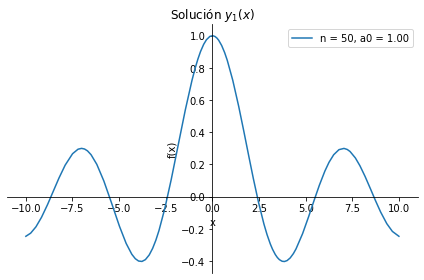

In [10]:
# Declarar variables
x, m, a0 = sp.symbols('x m a0')

# Funciones
f1 = 1
f2 = x**2

# Parametros
o = 0      # Polo de la ecuación de Frobenius. Allí se centra la serie de Taylor
n = 50    # Mayor grado expansión de Taylor

# lista de los coeficientes de las funciones analiticas
b = sp.zeros(1,n)
c = sp.zeros(1,n)

for i in range(0,n):
    p = sp.diff(f1,x,i).subs(x,o)/sp.factorial(i)
    q = sp.diff(f2,x,i).subs(x,o)/sp.factorial(i)
    b[i] = p
    c[i] = q

# Hallamos raices utilizando ecuacion indicadora    
a1, b1, c1 = 1, b[0]-1, c[0]      # Coeficientes ecuación cuadrática
dis = b1**2 - 4*a1*c1             # Discriminante
m1 = (-b1+sp.sqrt(dis))/(2*a1)    # Raiz 1
m2 = (-b1-sp.sqrt(dis))/(2*a1)    # Raiz 2

# Creamos lista con los coeficientes de la solucion, donde a0 se deja como
# variable simbolica (depende condiciones iniciales). a1 depende de la ecuacion de recurrencia
a = sp.zeros(n)
a[0] = a0
a[1] = -(a0*(m1*b[1]+c[1])) / (m1*(m1+1)+b[0]*(m1+1)+c[0])

# Definimos la ecuacion indicadora. Se deja en función de la variable simbolica 'm'
def ind(n):
    y = (m+n)*(m+n-1)+b[0]*(m+n)+c[0]
    return y

# Ecuacion recurrencia
def fun(n):
    suma=0
    for i in range(0,n):
        suma += a[i]*((m+i)*b[n-i] +c[n-i]) 
    coe = -suma/ind(n)         # Coeficiente potencia x^n
    a[n] = coe

# Hallamos los coeficientes de la solucion    
for t in range(2,n):
    fun(t)

# Evaluamos el valor de 'm' por 'm1'
A = sp.zeros(1,n)
for i in range(0,n):
    A[i] = a[i].subs(m, m1)

# Expresamos una parte de la primera solucion
suma = 0
for i in range(0,n):
    suma += A[i]*x**i

# Primera solucion    
sol1 = x**m1*(suma)

# Hacemos un ejemplo
p = 1
solp = sol1.subs(a0,p)

plot = splt.plot(solp,(x,-10,10),label='n = %d, a0 = %.2f'%(n,p), show=False)
plot.legend = True
plot.title = 'Solución $y_1(x)$'
plot.show()

In [4]:
def sol1_p(p):
    solp = sol1.subs(a0,p)
    plot = splt.plot(solp,(x,-10,20),label='n = %d'%(n), show=False)
    plot.legend = True
    plot.title = 'Solución $y_1(x)$'
    plot.show()

### a) Segunda solución $y_2(x)$

La segunda solucion depende de como son las raices. En el segundo caso las raices son iguales y se sigue de la siguiente manera:

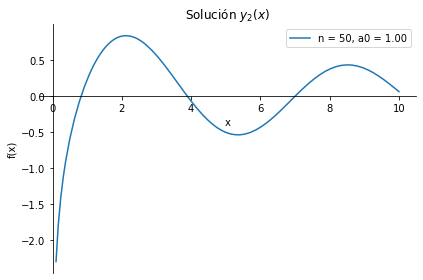

In [11]:
if m1 == m2:
    # Calculamos los coeficientes de la segunda serie. Estos vienen en funcion de las derivadas
    # de los coeficientes de la primera solución.
    B = sp.zeros(1,n)
    for i in range(0,n): #Observe que la serie empieza con B1, por ende "no va a haber" el termino B0 en relacion con a0
        B[i] = sp.diff(a[i+1],m).subs(m,m1)
    
    # Expresamos una parte de la primera solucion
    suma2 = 0
    for i in range (0,n):
        suma2 += B[i]*x**(i+1)
    
    # Segunda solucion
    sol2 = sol1*sp.log(x) + x**m1 * suma2

    # Hacemos un ejemplo
    solp = sol2.subs(a0,p)

    plot = splt.plot(solp,(x,0.1,10),label='n = %d, a0 = %.2f'%(n,p), show=False)
    plot.legend = True
    plot.title = 'Solución $y_2(x)$'
    plot.show()

In [7]:
def sol2_p(p):
    solp = sol2.subs(a0,p)
    plot = splt.plot(solp,(x,0.1,10),label='n = %d, a0 = %.2f'%(n,p), show=False)
    plot.legend = True
    plot.title = 'Solución $y_2(x)$'
    plot.show()

## c) Solución general $y(x)$

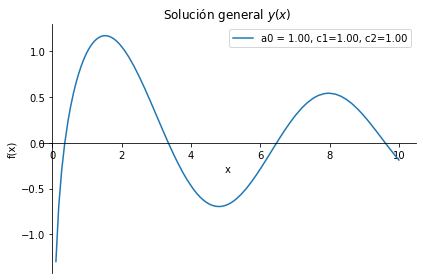

In [14]:
# Tenemos una familia de soluciones
c1, c2 = sp.symbols('c1 c2')    # Constantes solución general

# Solución general
sol_general = c1*sol1 + c2*sol2

# Ejemplo
p=1
cte1 = 1
cte2 = 1
solp = sol_general.subs(a0,p).subs(c1,cte1).subs(c2,cte2)

plot = splt.plot(solp,(x,0.1,10),label='a0 = %.2f, c1=%.2f, c2=%.2f'%(p,cte1,cte2), show=False)
plot.legend = True
plot.title = 'Solución general $y(x)$'
plot.show()

In [15]:
def sol_general_p(p,c1,c2):
    solp = sol_general.subs(a0,p).subs(c1,1).subs(c2,1)
    plot = splt.plot(solp,(x,0.1,10),label='a0 = %.2f, c1=%.2f, c2=%.2f'%(p,cte1,cte2), show=False)
    plot.legend = True
    plot.title = 'Solución general $y(x)$'
    plot.show()